In [1]:
from first_functions import *

In [2]:
directory_stations_2020 = "C:\\Users\\renan\\OneDrive\\Documentos\\GitHub\\Consume_and_Weather_dissertação\\dados_metereo_rj\\raw\\2020_rj"

os.chdir(directory_stations_2020)

In [3]:
df_stations_2023 = pd.read_csv('df_stations_final.csv')

In [4]:
### necessário tratar missing values
"TRANSFORMAÇÃO DA BASE"

df_stations = tratando_missing_values(df_stations_2023)


#caso o usuário da biblioteca queira testar o efeito de algum outro dataset com variável nox é no mínimo necessário que
#os timesteps de ambas as bases estejam iguais para o possível join.

"função para transformação do timestep em data e hora e junção das bases nox"

# df_stations_nox = join_databases(df_stations, databasenox)

c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:390: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Preenche os valores ausentes com a média


'função para transformação do timestep em data e hora e junção das bases nox'

In [5]:
df_stations = df_stations[df_stations_2023['uf'] == "RJ"]

In [6]:
df_stations.columns

Index(['data', 'hora', 'precipitacao', 'pressao_atmosferica',
       'pressao_atmosferica_maxima', 'pressao_atmosferica_minima', 'radiacao',
       'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
       'temperatura_minima', 'temperatura_orvalho_maxima',
       'temperatura_orvalho_minima', 'umidade_relativa_maxima',
       'umidade_relativa_minima', 'umidade_relativa', 'vento_direcao',
       'vento_rajada', 'vento_velocidade', 'ano', 'mes', 'dia', 'regiao', 'uf',
       'estacao', 'codigo_wmo', 'latitude', 'longitude', 'altitude',
       'data_fundacao'],
      dtype='object')

In [7]:
df_stations_modify = transform_month_to_season(df_stations)

c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:653: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df[month_col].apply(lambda x: (x % 12 + 3) // 3)


In [8]:
#escolhendo variáveis e modelo

numeric_features = ['pressao_atmosferica', 'temperatura_ar', 'umidade_relativa', 'vento_velocidade', 'latitude', 'longitude', 'altitude']
categorical_features = ['season']

# modelo random forest para teste
model = RandomForestRegressor(n_estimators=100, random_state=42)
model_name = "Random Forest"

Preenchendo valores ausentes...


c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))


Calculando matriz de correlação...


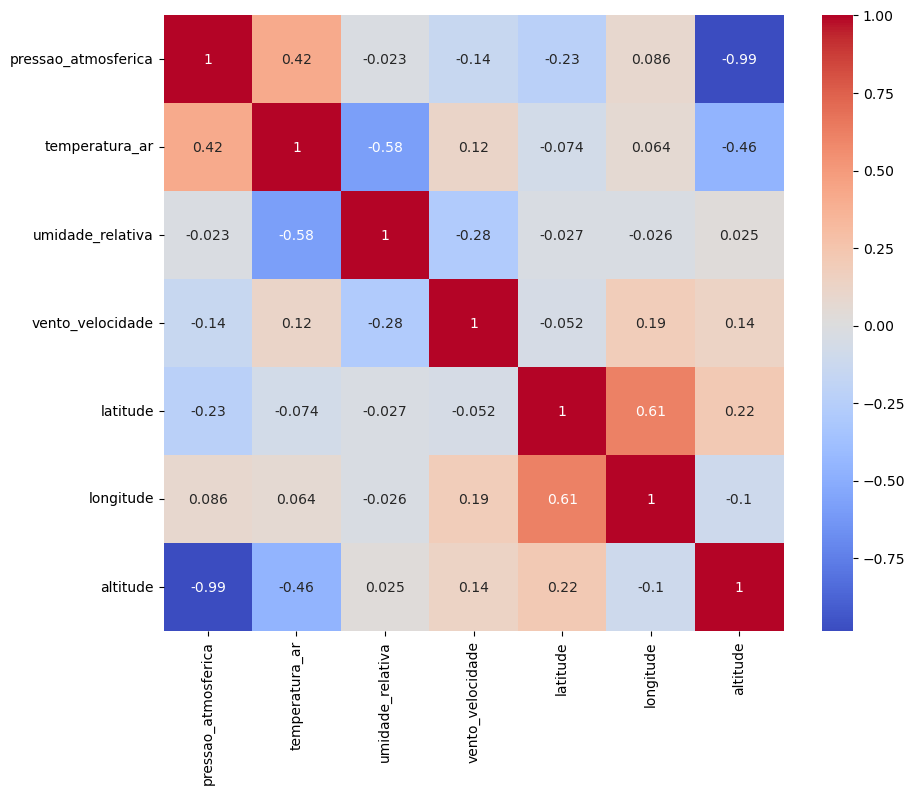

Dividindo os dados em treino e teste...
Treinando o modelo (Random Forest)...
Realizando previsões...
Avaliando o modelo...
Mean Squared Error (Random Forest): 1.7652966054689654
Importância das características:
pressao_atmosferica: 0.2976740612086451
temperatura_ar: 0.22033113385432496
umidade_relativa: 0.10584478719001299
vento_velocidade: 0.18475014588438854
latitude: 0.04890841617565564
longitude: 0.03937382148607068
altitude: 0.03179476801917916
season_1: 0.0204984472404542
season_2: 0.028923209956913616
season_3: 0.0035858729951134356
season_4: 0.018315335989241628


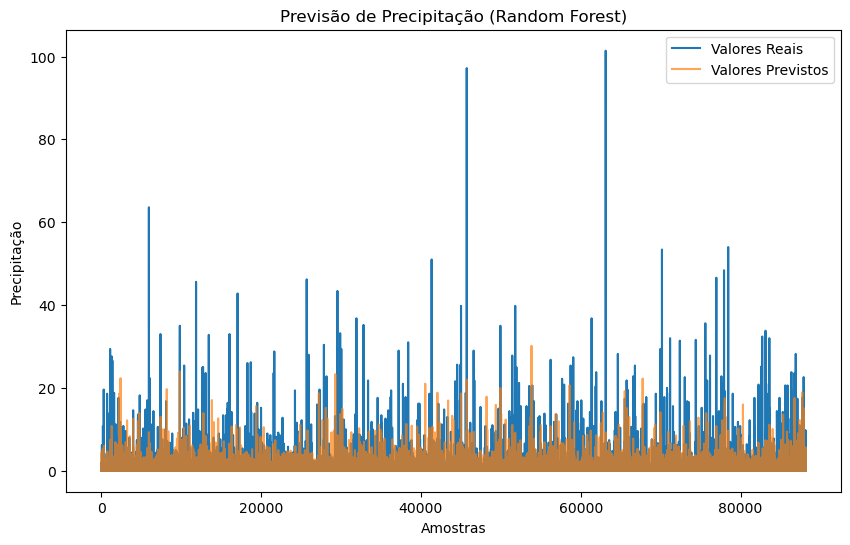

In [9]:
analyze_precipitation(df_stations_modify, numeric_features, categorical_features, model, model_name)

In [10]:
#escolhendo variáveis e modelo

numeric_features = ['pressao_atmosferica', 'temperatura_ar', 'umidade_relativa', 'vento_velocidade', 'latitude', 'longitude', 'altitude']
categorical_features = ['season']

# modelo random forest para teste
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_name = "SVM"

Preenchendo valores ausentes...


c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))


Calculando matriz de correlação...


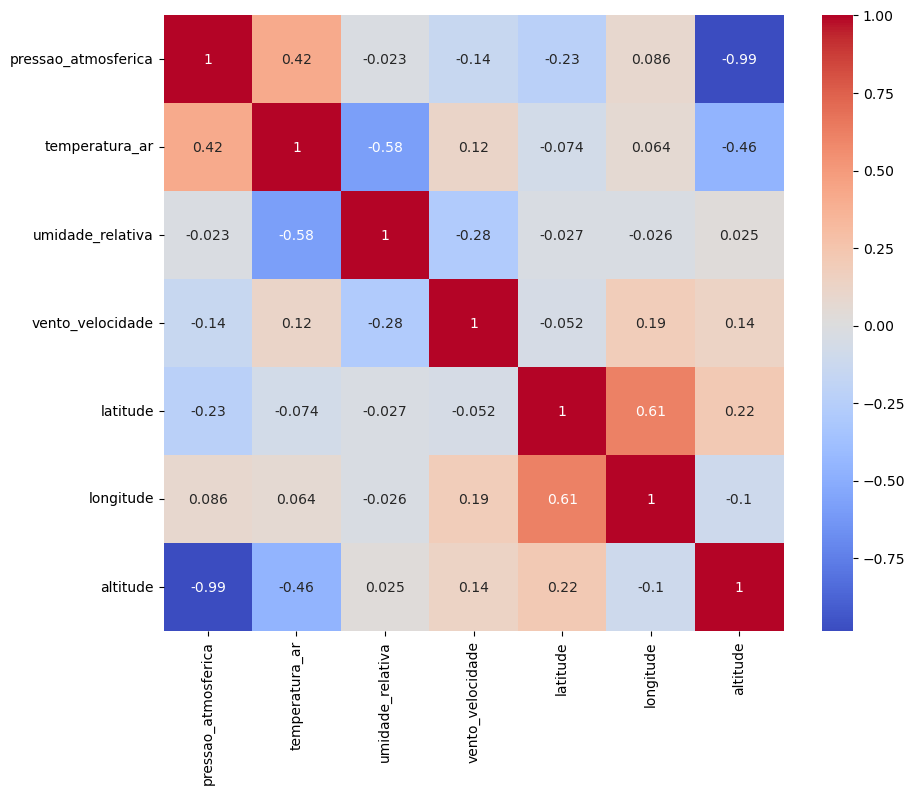

Dividindo os dados em treino e teste...
Treinando o modelo (SVM)...


In [11]:
analyze_precipitation(df_stations_modify, numeric_features, categorical_features, model, model_name)